# UN DATA ANALYSIS

Analysis on US Data comparing gdp per capita and internet usage

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Formatting

In [2]:
%matplotlib inline

### Load Data

In [3]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows=6729)

In [4]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

### DF info

In [5]:
gdp_df.info()
# 6731 rows, 4 columns
# country object, year object, value float64, value footnotes float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [6]:
internet_df.info()
# 4496 rows, 4 columns
#country or Area object, Year object, value float64, value or footnotes float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


### Examine footers

In [7]:
gdp_df[-10:]

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [8]:
internet_df[-10:]

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Delete Value footnotes

In [9]:
del gdp_df['Value Footnotes']

In [10]:
del internet_df['Value Footnotes']

### Change Column Names

In [11]:
gdp_df.columns=['Country','Year','Gdp_Per_Capita']

In [12]:
internet_df.columns=['Country','Year','Internet_users_Pct']

### Merge DFs

In [13]:
gdp_and_internet_use = pd.merge(gdp_df,
                                internet_df,
                                how = 'outer',
                                left_on = ['Country', 'Year'],
                                right_on = ['Country', 'Year'])

In [14]:
gdp_and_internet_use[:50]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2013,1807.762344,5.900000
6,Afghanistan,2012,1772.764974,5.454545
7,Afghanistan,2011,1626.764793,5.000000
8,Afghanistan,2010,1671.581238,4.000000
9,Afghanistan,2009,1502.354073,3.550000


### First Five Rows

In [15]:
gdp_and_internet_use[:5]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


### Last Five Rows

In [16]:
gdp_and_internet_use[-5:]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [17]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7705 entries, 0 to 7704
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             7705 non-null   object 
 1   Year                7705 non-null   int64  
 2   Gdp_Per_Capita      6729 non-null   float64
 3   Internet_users_Pct  4495 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 301.0+ KB


### Subset 2004,2009,2014

In [18]:
years = ['2004','2009','2014']
gdp_and_internet_use[gdp_and_internet_use.Year.isin(years)]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510


In [19]:
g_and_iu2004 = gdp_and_internet_use[gdp_and_internet_use.Year == 2004]

In [20]:
g_and_iu2009 = gdp_and_internet_use[gdp_and_internet_use.Year == 2009]

In [21]:
g_and_iu2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]
g_and_iu2014

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09
79,Angola,2014,6813.052106,21.26
108,Antigua and Barbuda,2014,20440.540555,64.00
...,...,...,...,...
7541,Swaziland,2014,NaN,27.10
7562,Syria,2014,NaN,28.09
7605,T.F.Y.R. Macedonia,2014,NaN,68.06
7663,Viet Nam,2014,NaN,48.31


### Max internet use by Year

In [22]:
mos14 = max(g_and_iu2014.Internet_users_Pct)
g_and_iu2014[g_and_iu2014.Internet_users_Pct == mos14]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
2581,Iceland,2014,42774.888849,98.16


In [23]:
mos09 = max(g_and_iu2009.Internet_users_Pct)
g_and_iu2009[g_and_iu2009.Internet_users_Pct == mos09]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
2586,Iceland,2009,41505.084834,93.0


In [24]:
mos04 = max(g_and_iu2004.Internet_users_Pct)
g_and_iu2004[g_and_iu2004.Internet_users_Pct == mos04]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
5852,Sweden,2004,40177.850408,83.89


### Lowest internet use by Year

In [25]:
min14 = min(g_and_iu2014.Internet_users_Pct)
g_and_iu2014[g_and_iu2014.Internet_users_Pct == min14]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


In [26]:
min09 = min(g_and_iu2009.Internet_users_Pct)
g_and_iu2009[g_and_iu2009.Internet_users_Pct == min09]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


In [27]:
min04 = min(g_and_iu2004.Internet_users_Pct)
g_and_iu2004[g_and_iu2004.Internet_users_Pct == min04]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


### Highest / Lowest GDP 2014

In [28]:
mxg14 = max(g_and_iu2014.Gdp_Per_Capita)
g_and_iu2014[g_and_iu2014.Gdp_Per_Capita == mxg14]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


In [29]:
mng14 = min(g_and_iu2014.Gdp_Per_Capita)
g_and_iu2014[g_and_iu2014.Gdp_Per_Capita == mng14]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
1014,Central African Republic,2014,672.681648,NaN


### Scatter Plots!!!!

Text(0, 0.5, 'Gdp Per Capita')

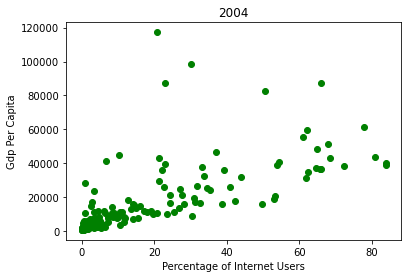

In [30]:
plt.scatter(g_and_iu2004.Internet_users_Pct, g_and_iu2004.Gdp_Per_Capita, color = 'green')

plt.title('2004')
plt.xlabel('Percentage of Internet Users')
plt.ylabel('Gdp Per Capita')

Text(0, 0.5, 'Gdp Per Capita')

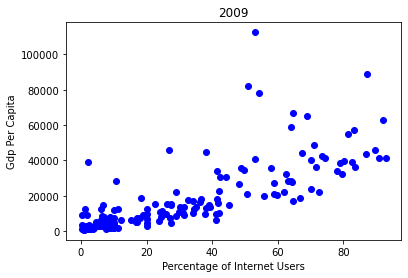

In [31]:
plt.scatter(g_and_iu2009.Internet_users_Pct, g_and_iu2009.Gdp_Per_Capita, color = 'blue')

plt.title('2009')
plt.xlabel('Percentage of Internet Users')
plt.ylabel('Gdp Per Capita')

Text(0, 0.5, 'Gdp Per Capita')

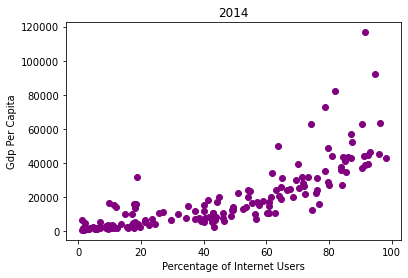

In [32]:
plt.scatter(g_and_iu2014.Internet_users_Pct, g_and_iu2014.Gdp_Per_Capita, color = 'purple')

plt.title('2014')
plt.xlabel('Percentage of Internet Users')
plt.ylabel('Gdp Per Capita')

### Cursory Analysis 24-26

I think an argument can be made that these numbers reigned themselves in in 2014, with the outliers spiking more and more to the higher percentages of internet users. I would say that the GDP is unimodal but I'm not so sure about PCT of Internet Users.


### Top 5 Internet

In [33]:
g_and_iu2014.sort_values(by=['Internet_users_Pct'], ascending = False)[:5]

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


In [41]:
years = ['2004','2009','2014']
ic1 = gdp_and_internet_use[gdp_and_internet_use.Country == 'Iceland']
ic = ic1[ic1.Year.isin(years)]
Nw1 = gdp_and_internet_use[gdp_and_internet_use.Country == 'Norway']
nw = Nw1[Nw1.Year.isin(years)]
dn1 = gdp_and_internet_use[gdp_and_internet_use.Country == 'Denmark']
dn = dn1[dn1.Year.isin(years)]
lx1 = gdp_and_internet_use[gdp_and_internet_use.Country == 'Bermuda']
lx = lx1[lx1.Year.isin(years)]
nt1 = gdp_and_internet_use[gdp_and_internet_use.Country == 'Andorra']
nt = nt1[nt1.Year.isin(years)]
top514 = pd.concat([ic, nw, dn, lx, nt])
top514

,Country,Year,Gdp_Per_Capita,Internet_users_Pct
2581,Iceland,2014,42774.888849,98.160000
2586,Iceland,2009,41505.084834,93.000000
2591,Iceland,2004,38893.378798,83.880000
4530,Norway,2014,63328.259526,96.300000
4535,Norway,2009,62617.153609,92.080000
4540,Norway,2004,61612.275634,77.690000
1404,Denmark,2014,45057.083449,95.990000
1409,Denmark,2009,43382.615688,86.840000
1414,Denmark,2004,43670.446201,80.930000
542,Bermuda,2009,57151.919132,83.250000


In [40]:
help.swap()

AttributeError: '_Helper' object has no attribute 'swap'

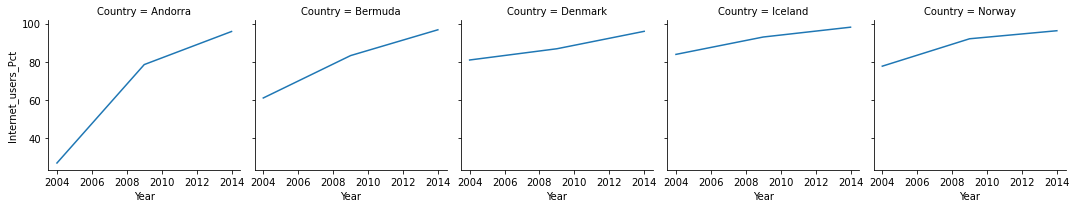

In [45]:
### first create the grid
facet_top2014 = sns.FacetGrid(top514.sort_values(by=['Country', 'Year']), col='Country', height= 3)
### then populate it
facet_top2014.map(plt.plot, 'Year', 'Internet_users_Pct')
###swap level function? can't get it to work

In [ ]:
sns.relplot(data=top514, x="Year", y="Internet_users_Pct", kind="line", hue="Country")

### Bottom 5 Internet

In [ ]:
g_and_iu2014.sort_values(by=['Internet_users_Pct'], ascending = True)[:5]

In [ ]:
years = ['2004','2009','2014']
drk1 = gdp_and_internet_use[gdp_and_internet_use.Country == "Dem. People's Rep. of Korea" ]
drk = drk1[drk1.Year.isin(years)]
er1 = gdp_and_internet_use[gdp_and_internet_use.Country == "Eritrea"]
er = er1[er1.Year.isin(years)]
tl1 = gdp_and_internet_use[gdp_and_internet_use.Country == "Timor-Leste"]
tl = tl1[tl1.Year.isin(years)]
bur1 = gdp_and_internet_use[gdp_and_internet_use.Country == "Burundi"]
bur = bur1[bur1.Year.isin(years)]
som1 = gdp_and_internet_use[gdp_and_internet_use.Country == "Somalia"]
som = som1[som1.Year.isin(years)]
bot514 = pd.concat([drk, er, tl, bur, som])
bot514

In [ ]:
facet_bot2014 = sns.FacetGrid(bot514, col='Country', height= 3)
facet_bot2014.map(plt.plot, 'Year', 'Internet_users_Pct')
### North Korea had the least by a mile

### Top 5 Gdp 2014

In [43]:
##finding top countries by gdp in 2014
topg2014 = g_and_iu2014.sort_values(by='Gdp_Per_Capita', ascending = False)[:5]
topg2014
## creating list of countries from above query
tg_countries = ['Macao SAR, China', 'Qatar', 'Luxembourg', 'Singapore', 'Brunei']
topgall = gdp_and_internet_use[gdp_and_internet_use.Country.isin(tg_countries)]

In [42]:
facet_topg2014 = sns.FacetGrid(topgall, col="Country", height = 3)
facet_topg2014.map(plt.plot, 'Year', 'Gdp_Per_Capita')

NameError: name 'topgall' is not defined

### Bottom 5 Gdp 2014

In [37]:
### finding the bottom countries by gdp in 2014
botg2014 = g_and_iu2014.sort_values(by='Gdp_Per_Capita', ascending = True)[:5]
botg2014
###creating a list of countries from the query
bg_countries = ['Central African Republic', 'Burundi', 'Dem. Rep. Congo', 'Niger', 'Malawi']
botgall = gdp_and_internet_use[gdp_and_internet_use.Country.isin(bg_countries)]

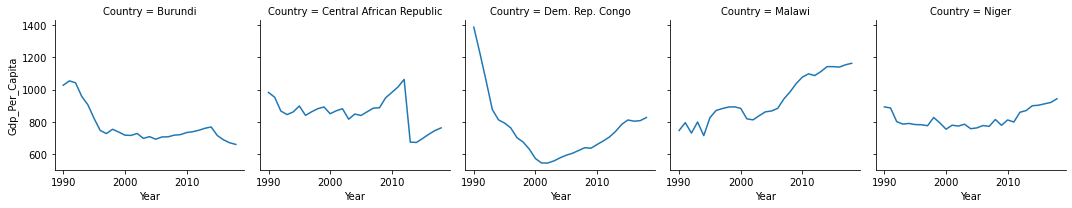

In [38]:
facet_botg2014 = sns.FacetGrid(botgall, col="Country", height = 3)
facet_botg2014.map(plt.plot, 'Year', 'Gdp_Per_Capita')

In [ ]:
### I'm surprised that Congo used to be fairly rich in terms of gdp. The change of its unilateral political government
### to a multi party system culminated in Civil War in 1997, which destroyed its economy.